In [ ]:
import pandas as pd


In [2]:
# Load the datasets
trips_by_distance = pd.read_csv("Trips_by_Distance.csv")
trips_full_data = pd.read_csv("Trips_Full Data.csv")

In [3]:

# Display the first few rows of each dataset to understand their structure
print(trips_by_distance.head())
print(trips_full_data.head())

      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         NaN               NaN          NaN         NaN   
1  National  1/2/2019         NaN               NaN          NaN         NaN   
2  National  1/3/2019         NaN               NaN          NaN         NaN   
3  National  1/4/2019         NaN               NaN          NaN         NaN   
4  National  1/5/2019         NaN               NaN          NaN         NaN   

   Population Staying at Home  Population Not Staying at Home  \
0                  77433867.0                     248733553.0   
1                  61305201.0                     264862219.0   
2                  63050480.0                     263116940.0   
3                  61803652.0                     264363768.0   
4                  64389745.0                     261777675.0   

   Number of Trips  Number of Trips <1  ...  Number of Trips 5-10  \
0     8.977844e+08         241667151.0  ...           12967

In [4]:
# Convert 'Date' column to datetime format
trips_by_distance['Date'] = pd.to_datetime(trips_by_distance['Date'], format='%m/%d/%Y')
trips_full_data['Date'] = pd.to_datetime(trips_full_data['Date'])

# Verify the conversion
print(trips_by_distance[['Date']].head())
print(trips_full_data[['Date']].head())


        Date
0 2019-01-01
1 2019-01-02
2 2019-01-03
3 2019-01-04
4 2019-01-05
        Date
0 2019-08-04
1 2019-08-05
2 2019-08-06
3 2019-08-07
4 2019-08-08


In [5]:
# Summing 'Population Staying at Home' and 'Population Not Staying at Home' for each date
home_vs_travel_summary = trips_by_distance.groupby('Date').agg({
    'Population Staying at Home': 'sum',
    'Population Not Staying at Home': 'sum'
}).reset_index()

print(home_vs_travel_summary.head())


        Date  Population Staying at Home  Population Not Staying at Home
0 2019-01-01                 232299247.0                     748265760.0
1 2019-01-02                 183913556.0                     796650755.0
2 2019-01-03                 189149328.0                     791415056.0
3 2019-01-04                 185409010.0                     795155997.0
4 2019-01-05                 193166813.0                     787396125.0


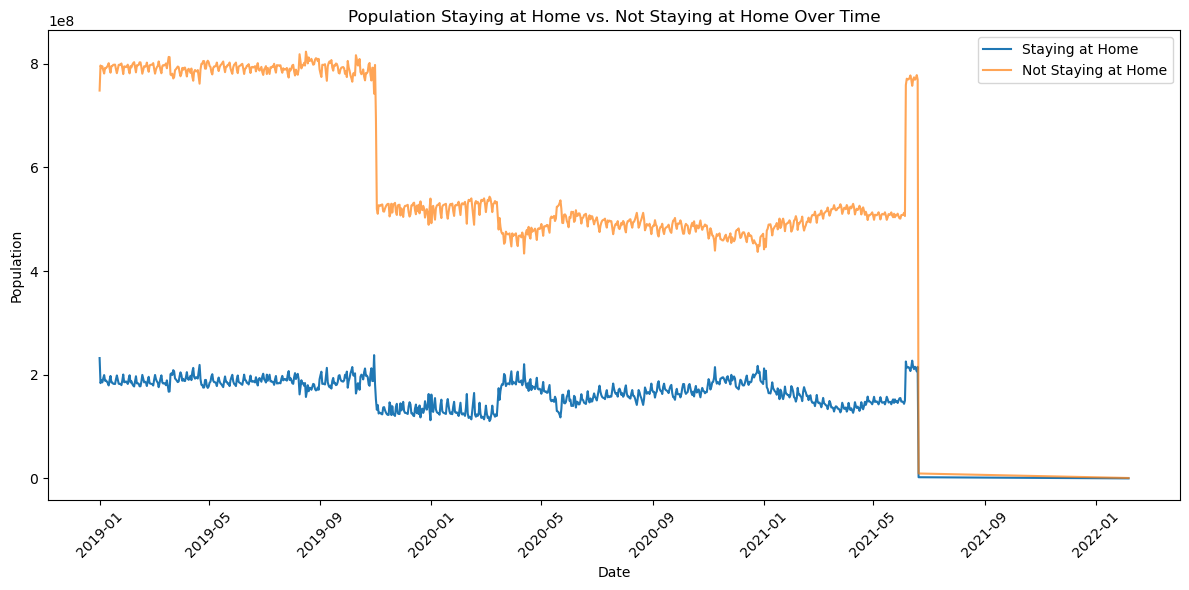

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(home_vs_travel_summary['Date'], home_vs_travel_summary['Population Staying at Home'], label='Staying at Home')
plt.plot(home_vs_travel_summary['Date'], home_vs_travel_summary['Population Not Staying at Home'], label='Not Staying at Home', alpha=0.7)
plt.title('Population Staying at Home vs. Not Staying at Home Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Calculate the daily change in population staying at home and not staying at home
home_vs_travel_summary['Change in Staying at Home'] = home_vs_travel_summary['Population Staying at Home'].diff()
home_vs_travel_summary['Change in Not Staying at Home'] = home_vs_travel_summary['Population Not Staying at Home'].diff()

# Look for large changes which might be outliers or significant events
large_changes_home = home_vs_travel_summary[abs(home_vs_travel_summary['Change in Staying at Home']) > home_vs_travel_summary['Change in Staying at Home'].quantile(0.95)]
large_changes_not_home = home_vs_travel_summary[abs(home_vs_travel_summary['Change in Not Staying at Home']) > home_vs_travel_summary['Change in Not Staying at Home'].quantile(0.95)]

print("Significant changes in population staying at home:")
print(large_changes_home)

print("\nSignificant changes in population not staying at home:")
print(large_changes_not_home)


Significant changes in population staying at home:
          Date  Population Staying at Home  Population Not Staying at Home  \
1   2019-01-02                 183913556.0                     796650755.0   
78  2019-03-20                 201397274.0                     779155227.0   
104 2019-04-15                 195922002.0                     784607132.0   
111 2019-04-22                 191731053.0                     788821063.0   
209 2019-07-29                 189995452.0                     790525930.0   
..         ...                         ...                             ...   
761 2021-01-31                 178193024.0                     476141844.0   
768 2021-02-07                 174847426.0                     479487442.0   
774 2021-02-13                 167519260.0                     486815608.0   
887 2021-06-06                 225668184.0                     759026124.0   
901 2021-06-20                   2447220.0                       9665187.0   

     Change 

In [8]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [9]:
from joblib import Parallel, delayed

# Assuming that each 'Number of Trips' column is already directly available in the DataFrame
# and does not need to be calculated from a range, we can simplify the function.

def calculate_average_trips(data, column_name):
    # Check if the column exists
    if column_name in data.columns:
        return data[column_name].mean()
    else:
        return None  # If the column doesn't exist, return None

# Create a list of column names based on the expected pattern in your DataFrame
column_names = ['Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
                'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100']

# Using joblib's Parallel and delayed to compute in parallel
averages = Parallel(n_jobs=-1)(delayed(calculate_average_trips)(trips_by_distance, col_name) for col_name in column_names)

for col_name, average in zip(column_names, averages):
    print(f"Average {col_name}: {average}")


Average Number of Trips <1: 612079.7946109837
Average Number of Trips 1-3: 619197.0181359083
Average Number of Trips 3-5: 304089.38627785153
Average Number of Trips 5-10: 384310.02051611344
Average Number of Trips 10-25: 375938.027613277
Average Number of Trips 25-50: 120812.80298563669
Average Number of Trips 50-100: 38847.12055522028
